# Air Pollution Health Analysis

## Environmental Data Analysis

This section explores air quality data across different cities for the year 2024.

We analyze key pollutants like PM2.5, CO, and NO₂ to identify the most affected cities,  
understand how pollutant levels vary, and examine relationships between them.

These insights help us detect patterns and prepare for health-related predictions.

> **Note on Scope and Selection:**  
> This analysis focuses on the year **2024** as it offers the most complete and consistent data for both pollution and health outcomes across all cities.  
> The cities included were selected based on the availability of high-quality data and represent a diverse range of geographies, pollution profiles, and health system contexts.  
> This focused scope allows for more accurate modeling and meaningful comparison between urban environments.

### Data Extraction and Library Import

In [5]:
import pandas as pd

df = pd.read_csv("global_air_quality_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"]) #extract Year and Month from date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [7]:
df.head()

,Date,City,Country,AQI,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (ppb),SO2 (ppb),CO (ppm),O3 (ppb),Temperature (°C),Humidity (%),Wind Speed (m/s),Year,Month
0,2024-01-01,New York,USA,38,120.0,182.9,24.3,26.0,9.10,153.3,18.6,40,13.2,2024,1
1,2024-01-01,Los Angeles,USA,280,38.4,46.9,41.8,34.7,3.78,190.7,-2.2,59,9.5,2024,1
2,2024-01-01,London,UK,117,168.1,34.3,81.5,8.2,3.67,105.4,36.3,62,3.4,2024,1
3,2024-01-01,Beijing,China,197,96.8,35.4,18.5,39.4,9.51,92.8,29.9,32,1.8,2024,1
4,2024-01-01,Delhi,India,187,76.2,226.8,46.9,17.2,1.02,68.4,9.9,55,3.3,2024,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3660 non-null   datetime64[ns]
 1   City              3660 non-null   object        
 2   Country           3660 non-null   object        
 3   AQI               3660 non-null   int64         
 4   PM2.5 (µg/m³)     3660 non-null   float64       
 5   PM10 (µg/m³)      3660 non-null   float64       
 6   NO2 (ppb)         3660 non-null   float64       
 7   SO2 (ppb)         3660 non-null   float64       
 8   CO (ppm)          3660 non-null   float64       
 9   O3 (ppb)          3660 non-null   float64       
 10  Temperature (°C)  3660 non-null   float64       
 11  Humidity (%)      3660 non-null   int64         
 12  Wind Speed (m/s)  3660 non-null   float64       
 13  Year              3660 non-null   int32         
 14  Month             3660 n

In [11]:
df.describe()

,Date,AQI,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (ppb),SO2 (ppb),CO (ppm),O3 (ppb),Temperature (°C),Humidity (%),Wind Speed (m/s),Year,Month
count,3660,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.0,3660.000000
mean,2024-07-01 12:00:00,164.642077,126.380574,154.785956,52.960710,25.940328,5.023842,105.325929,15.061913,50.657104,7.788907,2024.0,6.513661
min,2024-01-01 00:00:00,30.000000,5.100000,10.000000,5.100000,2.000000,0.100000,10.100000,-10.000000,10.000000,0.500000,2024.0,1.000000
25%,2024-04-01 00:00:00,96.000000,63.700000,82.200000,29.175000,13.700000,2.590000,57.900000,2.175000,31.000000,4.100000,2024.0,4.000000
50%,2024-07-01 12:00:00,165.000000,125.850000,152.550000,52.800000,26.200000,4.910000,105.750000,15.000000,51.000000,7.800000,2024.0,7.000000
75%,2024-10-01 00:00:00,233.000000,187.000000,227.600000,76.700000,38.200000,7.560000,152.925000,27.525000,71.000000,11.500000,2024.0,10.000000
max,2024-12-31 00:00:00,300.000000,250.000000,300.000000,100.000000,50.000000,9.990000,200.000000,40.000000,90.000000,15.000000,2024.0,12.000000
std,NaN,78.571659,71.016089,84.045548,27.361413,14.001531,2.851573,55.032175,14.590761,23.195880,4.223788,0.0,3.451705


**Note:** This analysis focuses on the year **2024** because it offers the most complete data for both air quality and health outcomes across cities. Cities included were selected based on data completeness and geographic diversity.

### Data Cleaning

In [15]:
print("Duplicate rows:", df.duplicated().sum()) #check for duplicates

Duplicate rows: 0


In [17]:
print("\nMissing values:") # Check for null values (already 0, just verifying)
print(df.isnull().sum())


Missing values:
Date                0
City                0
Country             0
AQI                 0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
NO2 (ppb)           0
SO2 (ppb)           0
CO (ppm)            0
O3 (ppb)            0
Temperature (°C)    0
Humidity (%)        0
Wind Speed (m/s)    0
Year                0
Month               0
dtype: int64


In [19]:
# Check for negative or extreme outliers in pollutant data
pollutants = ["AQI", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO2 (ppb)", "SO2 (ppb)", "CO (ppm)", "O3 (ppb)"]
print("\nValue ranges for pollutants:")
for col in pollutants:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")


Value ranges for pollutants:
AQI: min=30, max=300
PM2.5 (µg/m³): min=5.1, max=250.0
PM10 (µg/m³): min=10.0, max=300.0
NO2 (ppb): min=5.1, max=100.0
SO2 (ppb): min=2.0, max=50.0
CO (ppm): min=0.1, max=9.99
O3 (ppb): min=10.1, max=200.0


In [21]:
print("Years in dataset:", df["Year"].unique()) # Check available years in the dataset

Years in dataset: [2024]


### Basic KPI Visualization

#### 1. Identify which cities had the worst fine particle pollution (PM2.5) on average in 2024

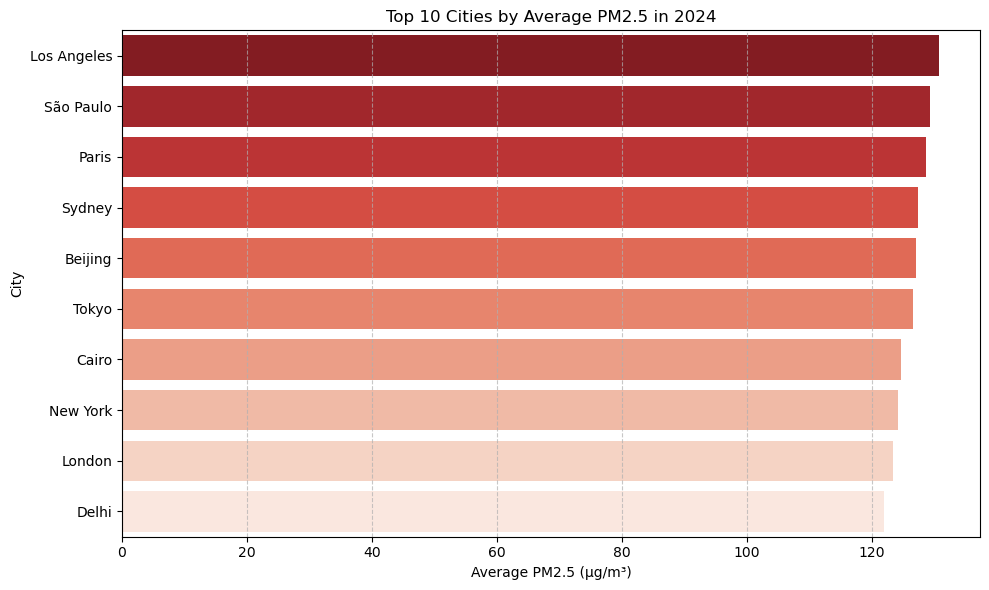

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2024 = df[df["Year"] == 2024] # Data Preparation
top_pm25 = df_2024.groupby("City")["PM2.5 (µg/m³)"].mean().sort_values(ascending=False).head(10)

top_pm25_df = top_pm25.reset_index().rename(columns={"PM2.5 (µg/m³)": "PM2.5"}) # Convert to DataFrame

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_pm25_df,
    x="PM2.5", y="City",
    hue="City",  # this avoids the future warning
    palette="Reds_r",
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Average PM2.5 in 2024")
plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("City")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Top 10 Cities by Average PM2.5 in 2024

This chart shows the cities with the highest PM2.5 levels in 2024.  
PM2.5 is a harmful pollutant linked to breathing and heart problems.

Los Angeles, Sao Paulo, and Paris had the worst air quality in this group.  
Even cities like Paris and Sydney, which are usually cleaner, show high levels.  
This highlights the need for better pollution control in these areas.


#### 2. Pollution Distribution

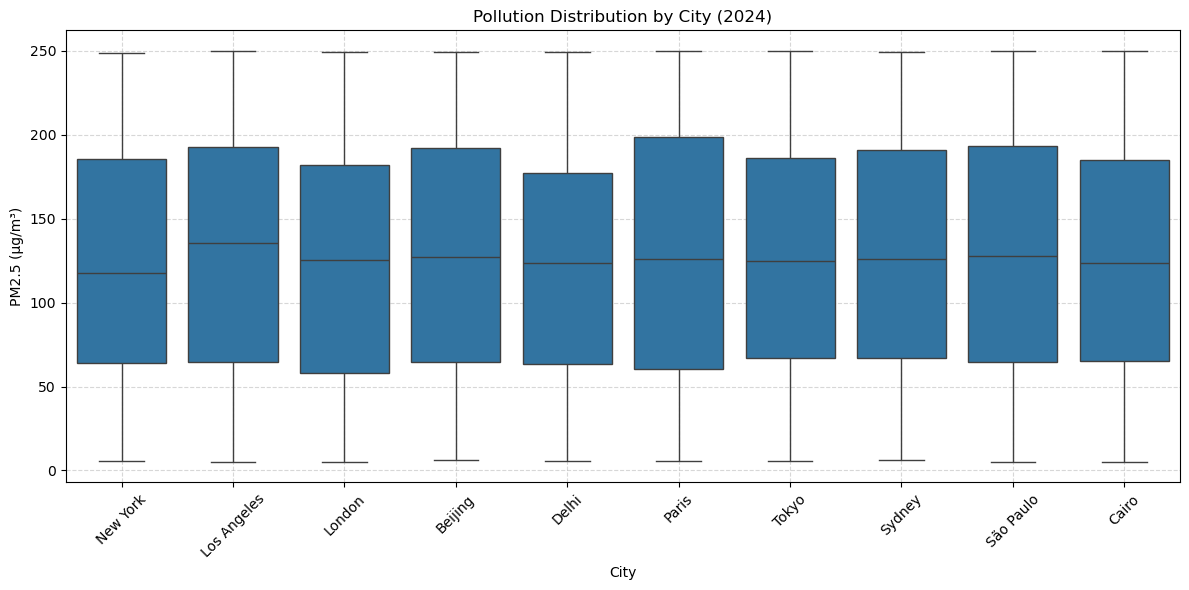

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="City", y="PM2.5 (µg/m³)")
plt.title("Pollution Distribution by City (2024)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### Pollution Distribution by City (2024)

This chart shows how PM2.5 levels vary in each city.  
The boxes represent the typical range, while lines show extreme values.

Some cities, like Paris and Los Angeles, have higher variation in PM2.5.  
This means air quality changes a lot day to day.  
High variation can increase health risks for residents.


#### 3. Monthly Average PM2.5 (All Cities)

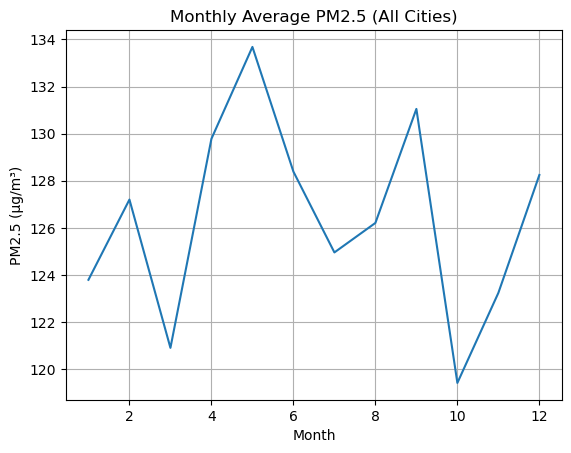

In [33]:
monthly_pm25 = df.groupby("Month")["PM2.5 (µg/m³)"].mean()
plt.plot(monthly_pm25.index, monthly_pm25.values)
plt.title("Monthly Average PM2.5 (All Cities)")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

This seasonal analysis shows that PM2.5 pollution levels vary meaningfully throughout the year. A notable peak appears in May, possibly due to industrial or agricultural activities in spring. A sharp drop in October may reflect cleaner atmospheric conditions in early fall, possibly due to changes in wind or rainfall. These fluctuations highlight the need for seasonally adjusted air quality regulations and public health alerts during peak pollution months.

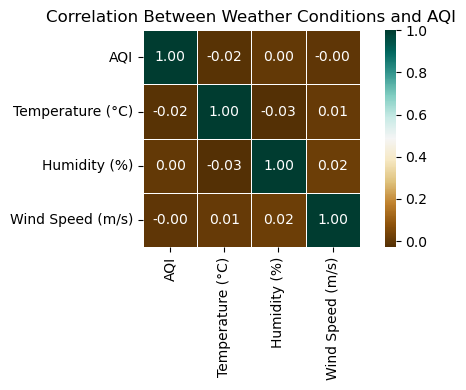

In [84]:
# Extract weather-related columns
weather_columns = ["AQI", "Temperature (°C)", "Humidity (%)", "Wind Speed (m/s)"]
weather_corr = df[weather_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weather_corr, annot=True, cmap="BrBG", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Between Weather Conditions and AQI", fontsize=12)
plt.tight_layout()
plt.show()


##### Weather Conditions and Their Relationship with AQI

In addition to chemical pollutants, weather conditions such as temperature, humidity, and wind speed can also influence air quality. These meteorological factors affect the dispersion and accumulation of pollutants in the atmosphere.

The heatmap shows how these weather variables are correlated with the Air Quality Index (AQI).

#### 4. how strongly pollutants are related to each other

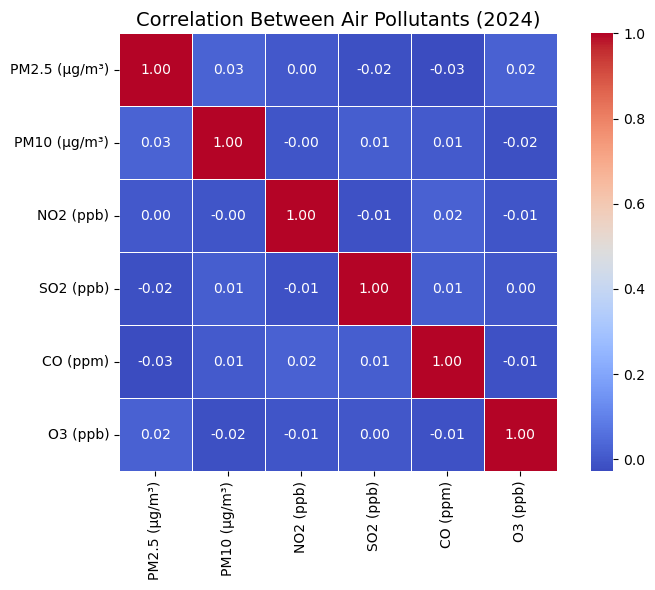

In [21]:
import numpy as np

pollutants = ["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO2 (ppb)", "SO2 (ppb)", "CO (ppm)", "O3 (ppb)"] # Select only pollutant columns
pollution_data = df[pollutants]

corr_matrix = pollution_data.corr() # Compute correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Between Air Pollutants (2024)", fontsize=14)
plt.tight_layout()
plt.show()

##### Correlation Between Air Pollutants (2024)

This heatmap shows how different pollutants are related to each other.

Most values are close to zero, meaning the pollutants are not strongly connected.  
Each pollutant behaves differently and may affect air quality in its own way.

This helps us decide to include all of them in further analysis.


### Exploring more Features

In [24]:
from sklearn.ensemble import RandomForestRegressor

features = ["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO2 (ppb)", "SO2 (ppb)", "CO (ppm)", "O3 (ppb)"] # Define feature & target columns
X = df[features]
y = df["AQI"]

model = RandomForestRegressor(n_estimators=100, random_state=42) # Train Random Forest Regressor
model.fit(X, y)

importances = model.feature_importances_ # Extract feature importances
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)


#### 1. Which pollutants most influence the AQI?

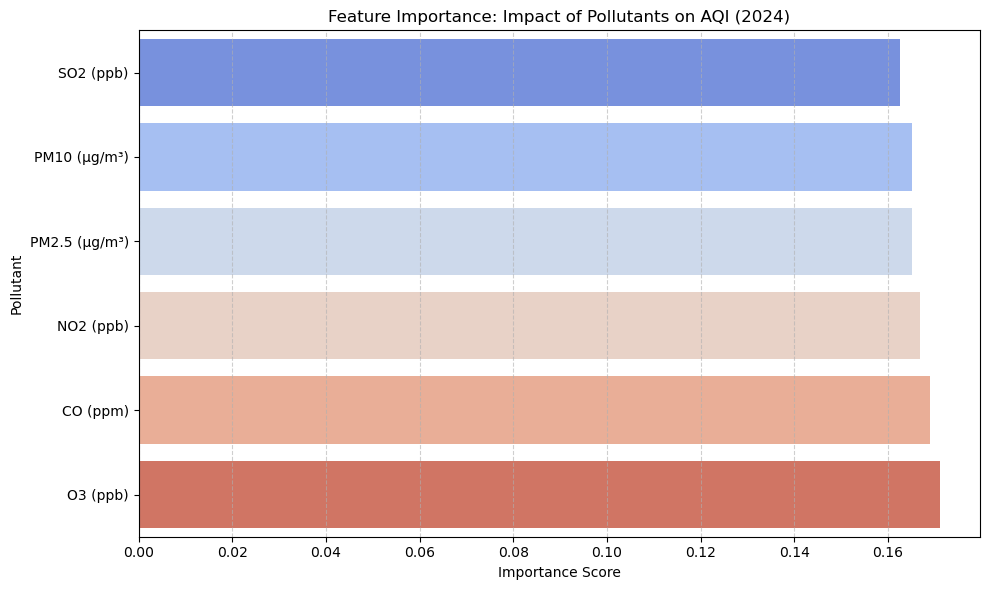

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="coolwarm",
    legend=False,
    dodge=False
)
plt.title("Feature Importance: Impact of Pollutants on AQI (2024)")
plt.xlabel("Importance Score")
plt.ylabel("Pollutant")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Impact of Pollutants on AQI (2024)

This chart shows which pollutants have the biggest effect on AQI.

O₃ and CO are the top contributors, followed by NO₂ and PM2.5.  
Each pollutant plays a role, but some have more impact on air quality than others.

These results help us focus on the most harmful pollutants for better air management.


## Health Impact Modeling

To better understand how air pollution may affect public health,  
we use a second dataset that includes both pollution and health outcomes.  

We will train a machine learning model to learn this relationship,  
and then apply that model to our city-level dataset to estimate health risk in 2024.


### Load Health Dataset

In [30]:
df_health = pd.read_csv("air_quality_health_impact_data.csv")

df_health.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [31]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [32]:
df_health.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


##### This dataset contains:
- Pollution values (PM2.5, PM10, CO, NO₂, etc.)
- Health-related outcomes (e.g., respiratory cases, cardiovascular cases)
- A combined `HealthImpactScore` to represent overall health burden

We’ll use these features to train a prediction model.


#### Understanding the Health Impact Data Before Modeling

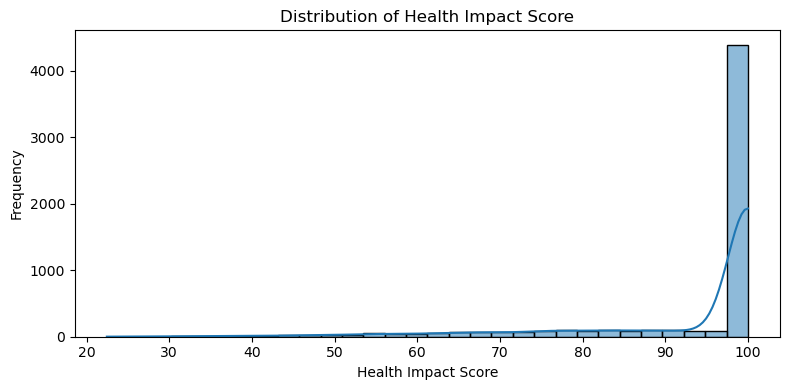

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(df_health["HealthImpactScore"], bins=30, kde=True)
plt.title("Distribution of Health Impact Score")
plt.xlabel("Health Impact Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### Distribution of Health Impact Score

This chart shows how health impact scores are distributed in the training dataset.

Most values are very high, close to 100.  
This means the model will mostly learn from high-risk cases,  
which should be considered when interpreting predictions.


### Train Models

#### 1. Predict Respiratory Cases

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X_respiratory = df_health[["PM2_5", "PM10", "NO2", "SO2", "O3"]]
y_respiratory = df_health["RespiratoryCases"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_respiratory, y_respiratory, test_size=0.2, random_state=42)

rf_respiratory_model = RandomForestRegressor(n_estimators=100, random_state=42) # Train the model
rf_respiratory_model.fit(X_train_r, y_train_r)

y_pred_r = rf_respiratory_model.predict(X_test_r) # predict
rmse_r = root_mean_squared_error(y_test_r, y_pred_r) 
print(f"Respiratory Cases Model RMSE: {rmse_r:.2f}")


Respiratory Cases Model RMSE: 3.29


##### Model 1: Predicting Respiratory Cases

Random Forest Regressor was trained to predict the number of respiratory-related health cases  
based on air pollution variables such as PM2.5, PM10, NO₂, SO₂, and O₃.

The dataset was split into training and testing sets using an 80/20 ratio.  
The model was evaluated using RMSE (Root Mean Squared Error).

The model achieved an RMSE of **3.29**, indicating that the predictions were reasonably accurate  
given the typical range of respiratory case values in the dataset.

#### 2. Predict Cardiovascular Cases

In [42]:
X_cardio = df_health[["PM2_5", "PM10", "NO2", "SO2", "O3"]]
y_cardio = df_health["CardiovascularCases"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cardio, y_cardio, test_size=0.2, random_state=42)

rf_cardio_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cardio_model.fit(X_train_c, y_train_c)

y_pred_c = rf_cardio_model.predict(X_test_c)
rmse_c = root_mean_squared_error(y_test_c, y_pred_c)
print(f"Cardiovascular Cases Model RMSE: {rmse_c:.2f}")

Cardiovascular Cases Model RMSE: 2.33


##### Model 2: Predicting Cardiovascular Cases

Random Forest Regressor was trained to predict the number of cardiovascular-related health cases  
based on air pollution variables such as PM2.5, PM10, NO₂, SO₂, and O₃.

The dataset was split into training and testing sets using an 80/20 ratio.  
The model was evaluated using RMSE (Root Mean Squared Error).

The model achieved an RMSE of **2.33**, indicating a good level of prediction accuracy  
for cardiovascular case estimates in the dataset.

#### 3. Predict Hospital Admissions

In [45]:
X_hosp = df_health[["PM2_5", "PM10", "NO2", "SO2", "O3"]]
y_hosp = df_health["HospitalAdmissions"]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hosp, y_hosp, test_size=0.2, random_state=42)

rf_hospital_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_hospital_model.fit(X_train_h, y_train_h)

y_pred_h = rf_hospital_model.predict(X_test_h)
rmse_h = root_mean_squared_error(y_test_h, y_pred_h)
print(f"Hospital Admissions Model RMSE: {rmse_h:.2f}")

Hospital Admissions Model RMSE: 1.42


##### Model 3: Predicting Hospital Admissions

Random Forest Regressor was trained to predict the number of hospital admissions  
based on air pollution variables such as PM2.5, PM10, NO₂, SO₂, and O₃.

The dataset was split into training and testing sets using an 80/20 ratio.  
The model was evaluated using RMSE (Root Mean Squared Error).

The model achieved an RMSE of **1.42**, indicating strong predictive performance  
for estimating hospital admissions based on pollution levels.

In [47]:
df_2024_renamed = df_2024.rename(columns={
    "PM2.5 (µg/m³)": "PM2_5",
    "PM10 (µg/m³)": "PM10",
    "NO2 (ppb)": "NO2",
    "SO2 (ppb)": "SO2",
    "O3 (ppb)": "O3"
})

X_city_2024 = df_2024_renamed[["PM2_5", "PM10", "NO2", "SO2", "O3"]]

df_2024_renamed["PredictedRespiratoryCases"] = rf_respiratory_model.predict(X_city_2024)
df_2024_renamed["PredictedCardiovascularCases"] = rf_cardio_model.predict(X_city_2024)
df_2024_renamed["PredictedHospitalAdmissions"] = rf_hospital_model.predict(X_city_2024)

### Visualization

#### 1. Top 10 Cities by Predicted Respiratory Cases (2024)

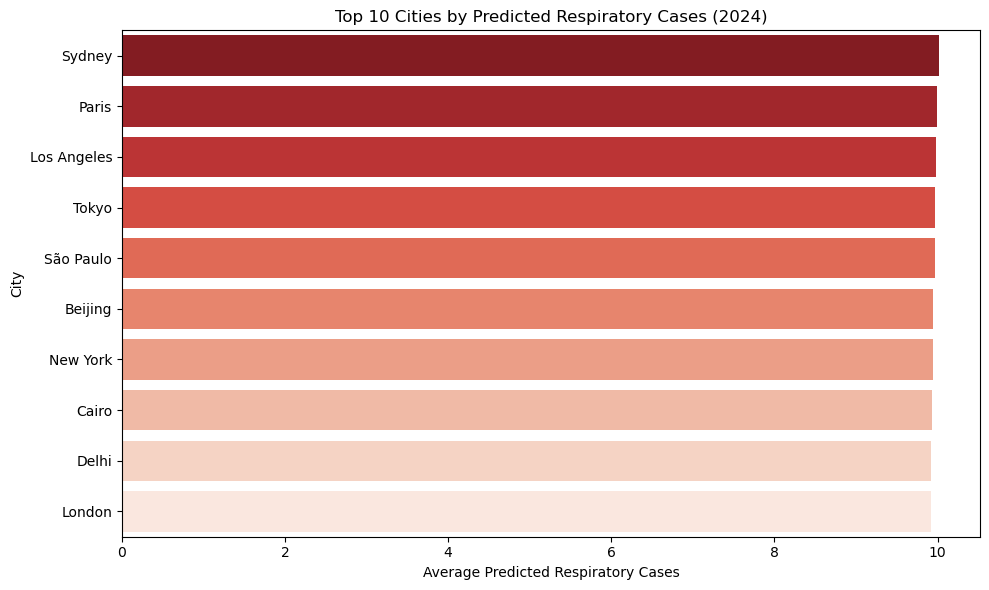

In [50]:
# Group by city and calculate average predicted respiratory cases
city_respiratory = df_2024_renamed.groupby("City")["PredictedRespiratoryCases"].mean().sort_values(ascending=False).head(10)

city_respiratory_df = city_respiratory.reset_index().rename(columns={
    "PredictedRespiratoryCases": "AverageRespiratoryCases"
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_respiratory_df,
    x="AverageRespiratoryCases",
    y="City",
    hue="City",  # avoids future warning
    palette="Reds_r",
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Predicted Respiratory Cases (2024)")
plt.xlabel("Average Predicted Respiratory Cases")
plt.ylabel("City")
plt.tight_layout()
plt.show()

##### Visualizing Predicted Respiratory Cases

This chart shows the top 10 cities with the highest average predicted respiratory health cases  
based on pollution exposure data from the year 2024.

The predictions were made using a trained Random Forest model, and represent how respiratory health  
may be affected by pollutants like PM2.5, PM10, NO₂, SO₂, and O₃ in different urban environments.

Cities such as Sydney, Paris, and Los Angeles are among the highest, indicating elevated risks  
of pollution-related respiratory issues. This output highlights locations where public health efforts  
and air quality interventions may be most needed.

#### 2. Top 10 Cities by Predicted Cardiovascular Cases (2024)

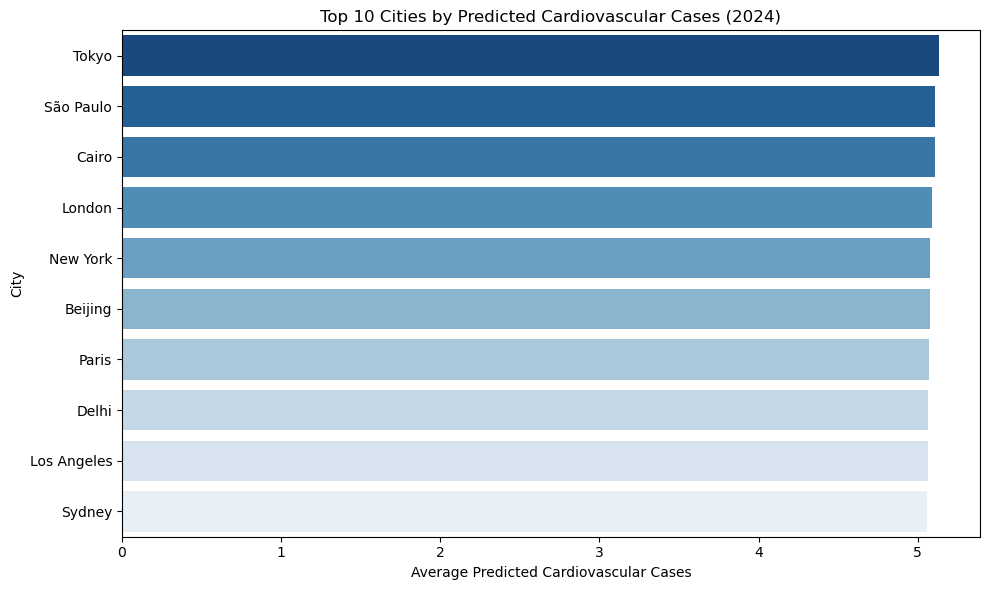

In [61]:
city_cardio = df_2024_renamed.groupby("City")["PredictedCardiovascularCases"].mean().sort_values(ascending=False).head(10)

city_cardio_df = city_cardio.reset_index().rename(columns={
    "PredictedCardiovascularCases": "AverageCardioCases"
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_cardio_df,
    x="AverageCardioCases",
    y="City",
    hue="City",  # avoids future warning
    palette="Blues_r",
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Predicted Cardiovascular Cases (2024)")
plt.xlabel("Average Predicted Cardiovascular Cases")
plt.ylabel("City")
plt.tight_layout()
plt.show()


##### Visualizing Predicted Cardiovascular Cases

This chart shows the top 10 cities with the highest average predicted cardiovascular health cases  
based on pollution exposure data from the year 2024.

The predictions were generated using a Random Forest model, trained on pollution-related variables  
including PM2.5, PM10, NO₂, SO₂, and O₃.

Cities such as Tokyo, Sao Paulo, and Cairo show the highest predicted cardiovascular risks.  
This output highlights where air quality may have a stronger link to heart-related health issues.

#### 3. Top 10 Cities by Predicted Hospital Admissions (2024)

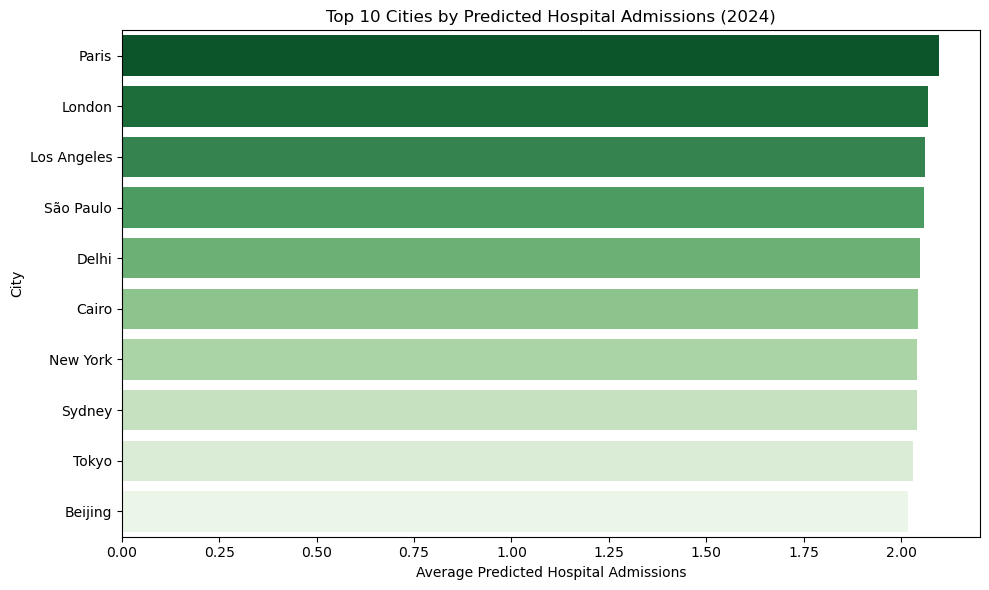

In [65]:
city_hospital = df_2024_renamed.groupby("City")["PredictedHospitalAdmissions"].mean().sort_values(ascending=False).head(10)

city_hospital_df = city_hospital.reset_index().rename(columns={
    "PredictedHospitalAdmissions": "AverageHospitalAdmissions"
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_hospital_df,
    x="AverageHospitalAdmissions",
    y="City",
    hue="City",  # avoids future warning
    palette="Greens_r",
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Predicted Hospital Admissions (2024)")
plt.xlabel("Average Predicted Hospital Admissions")
plt.ylabel("City")
plt.tight_layout()
plt.show()


##### Visualizing Predicted Hospital Admissions

This chart shows the top 10 cities with the highest average predicted hospital admissions  
based on pollution exposure data from the year 2024.

The predictions were generated using a Random Forest model, trained on air quality variables  
such as PM2.5, PM10, NO₂, SO₂, and O₃.

Cities like Paris, London, and Los Angeles lead the chart, suggesting these urban areas  
may face greater strain on healthcare systems due to pollution-related illnesses.

#### 4. Pollution vs Predicted Health Burden by City (2024)

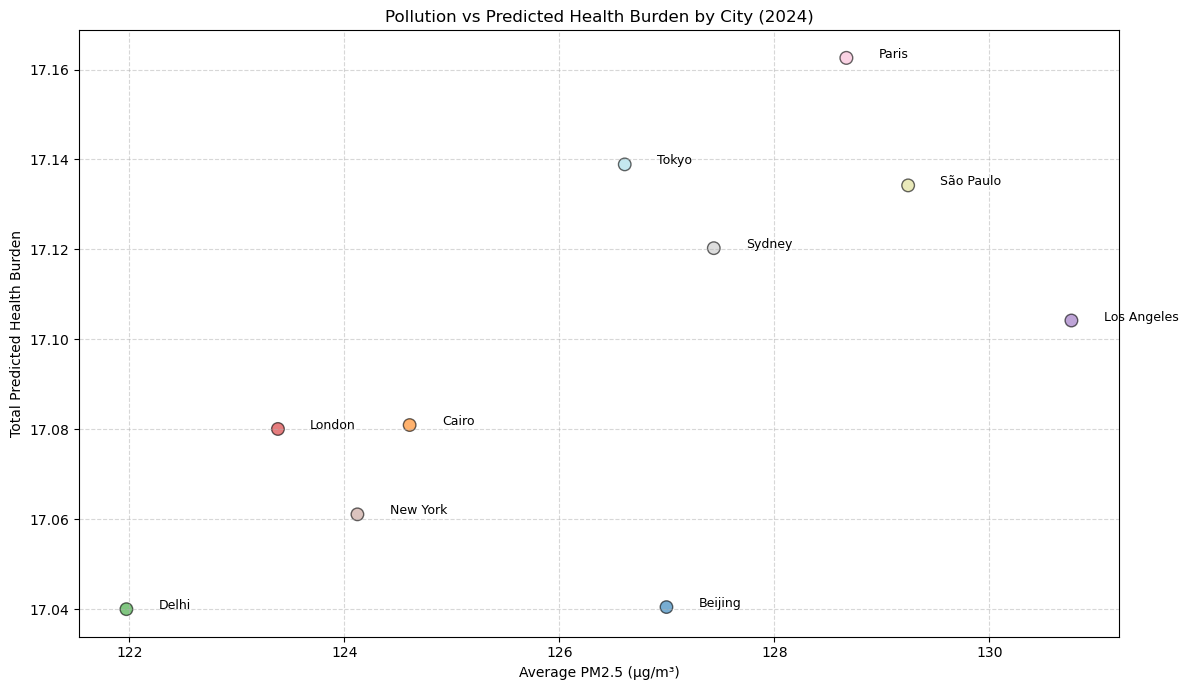

In [69]:
bubble_df = df_2024_renamed.groupby("City").agg({
    "PM2_5": "mean",
    "PredictedRespiratoryCases": "mean",
    "PredictedCardiovascularCases": "mean",
    "PredictedHospitalAdmissions": "mean"
}).reset_index()

bubble_df["TotalHealthBurden"] = (
    bubble_df["PredictedRespiratoryCases"] +
    bubble_df["PredictedCardiovascularCases"] +
    bubble_df["PredictedHospitalAdmissions"]
)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    bubble_df["PM2_5"],
    bubble_df["TotalHealthBurden"],
    s=bubble_df["PredictedHospitalAdmissions"] * 40,  # scale bubble size
    alpha=0.6,
    c=range(len(bubble_df)),
    cmap="tab20",
    edgecolors="black"
)

for i, row in bubble_df.iterrows():
    plt.text(row["PM2_5"] + 0.3, row["TotalHealthBurden"], row["City"], fontsize=9)

plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("Total Predicted Health Burden")
plt.title("Pollution vs Predicted Health Burden by City (2024)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### Pollution vs Predicted Health Burden (2024)

This scatterplot compares average PM2.5 pollution levels with the total predicted health burden  
for each city in the year 2024. The health burden combines respiratory cases, cardiovascular cases,  
and hospital admissions predicted by the trained models.

Cities like Paris, Sao Paulo, and Tokyo show both high pollution and high health burden scores.  
This relationship illustrates how air quality may directly influence overall public health impact.


#### 5. Health Burden Index (Normalized Score)

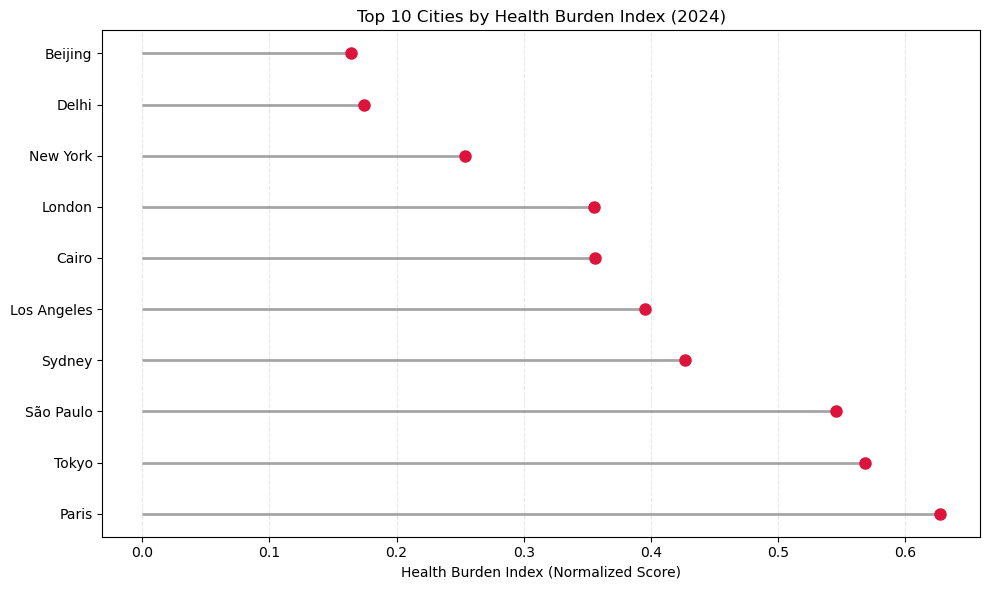

In [73]:
from sklearn.preprocessing import MinMaxScaler

city_health = df_2024_renamed.groupby("City")[[
    "PredictedRespiratoryCases",
    "PredictedCardiovascularCases",
    "PredictedHospitalAdmissions"
]].mean().reset_index() # Group mean predictions per city

scaler = MinMaxScaler() # Normalize each column
normalized = scaler.fit_transform(city_health.iloc[:, 1:])
city_health_normalized = city_health.copy()
city_health_normalized[["Respiratory", "Cardio", "Hospital"]] = normalized

city_health_normalized["HealthBurdenIndex"] = city_health_normalized[["Respiratory", "Cardio", "Hospital"]].mean(axis=1)

top_burden = city_health_normalized.sort_values("HealthBurdenIndex", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_burden["City"], xmin=0, xmax=top_burden["HealthBurdenIndex"], color="gray", alpha=0.7, linewidth=2)
plt.plot(top_burden["HealthBurdenIndex"], top_burden["City"], "o", markersize=8, color="crimson", label="Health Burden Index")

plt.xlabel("Health Burden Index (Normalized Score)")
plt.title("Top 10 Cities by Health Burden Index (2024)")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


##### Top 10 Cities by Health Burden Index (2024)

This chart ranks the top 10 cities based on a combined Health Burden Index,  
which aggregates predicted respiratory cases, cardiovascular cases, and hospital admissions.  
The scores are normalized to allow comparison across cities.

Paris, Tokyo, and Sao Paulo appear at the top, suggesting these cities may face the greatest  
overall public health impact from air pollution in 2024.


## Policy Relevance and Conclusion

The analysis identifies cities with high predicted respiratory, cardiovascular, and hospitalization burdens due to air pollution. The most affected cities include Paris, Tokyo, and Sao Paulo, with PM2.5 and O₃ playing significant roles.

Policy makers should consider:
- Implementing stricter emissions standards in urban areas
- Increasing public awareness during high-risk months (e.g., spring/fall)
- Targeting health interventions in cities with the highest health burden index

This study supports the importance of data-driven environmental policies to protect public health.
